Import the dataset

In [2]:
# Imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


In [3]:
NYPD_df = pd.read_csv("NEW_NYPD_DATASET.csv", header = 0)

NYPD_df.shape

(95162, 13)

In [4]:
NYPD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95162 entries, 0 to 95161
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CMPLNT_NUM        95162 non-null  int64 
 1   OFNS_DESC         95162 non-null  object
 2   CRM_ATPT_CPTD_CD  95162 non-null  object
 3   LAW_CAT_CD        95162 non-null  object
 4   BORO_NM           95162 non-null  object
 5   PREM_TYP_DESC     95162 non-null  object
 6   SUSP_AGE_GROUP    95162 non-null  object
 7   SUSP_RACE         95162 non-null  object
 8   SUSP_SEX          95162 non-null  object
 9   PATROL_BORO       95162 non-null  object
 10  VIC_AGE_GROUP     95162 non-null  object
 11  VIC_RACE          95162 non-null  object
 12  VIC_SEX           95162 non-null  object
dtypes: int64(1), object(12)
memory usage: 9.4+ MB


In [5]:
attributes = ["OFNS_DESC", "CRM_ATPT_CPTD_CD", "LAW_CAT_CD", "BORO_NM", "PREM_TYP_DESC", "SUSP_AGE_GROUP", "SUSP_RACE", "SUSP_SEX", "PATROL_BORO", "VIC_AGE_GROUP", "VIC_RACE", "VIC_SEX"]

In [6]:
NYPD_df = NYPD_df[ 
(NYPD_df['PREM_TYP_DESC'] == 'STREET') |
(NYPD_df['PREM_TYP_DESC'] == 'RESIDENCE - APT. HOUSE') |
(NYPD_df['PREM_TYP_DESC'] == 'RESIDENCE-HOUSE') |
(NYPD_df['PREM_TYP_DESC'] == 'RESIDENCE - PUBLIC HOUSING') |
(NYPD_df['PREM_TYP_DESC'] == 'CHAIN STORE') |
(NYPD_df['PREM_TYP_DESC'] == 'OTHER') |
(NYPD_df['PREM_TYP_DESC'] == 'TRANSIT - NYC SUBWAY') |
(NYPD_df['PREM_TYP_DESC'] == 'GROCERY/BODEGA') |
(NYPD_df['PREM_TYP_DESC'] == 'COMMERCIAL BUILDING')
]

NYPD_df.groupby('PREM_TYP_DESC').PREM_TYP_DESC.value_counts().nlargest(10)


PREM_TYP_DESC               PREM_TYP_DESC             
STREET                      STREET                        25539
RESIDENCE - APT. HOUSE      RESIDENCE - APT. HOUSE        23761
RESIDENCE-HOUSE             RESIDENCE-HOUSE                9433
RESIDENCE - PUBLIC HOUSING  RESIDENCE - PUBLIC HOUSING     8702
CHAIN STORE                 CHAIN STORE                    3322
OTHER                       OTHER                          2733
TRANSIT - NYC SUBWAY        TRANSIT - NYC SUBWAY           2332
GROCERY/BODEGA              GROCERY/BODEGA                 2324
COMMERCIAL BUILDING         COMMERCIAL BUILDING            1993
Name: PREM_TYP_DESC, dtype: int64

In [7]:
NYPD_df = NYPD_df[ 
(NYPD_df['OFNS_DESC'] == 'HARRASSMENT 2') |
(NYPD_df['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES') |
(NYPD_df['OFNS_DESC'] == 'PETIT LARCENY') |
(NYPD_df['OFNS_DESC'] == 'CRIMINAL MISCHIEF & RELATED OF') |
(NYPD_df['OFNS_DESC'] == 'OFF. AGNST PUB ORD SENSBLTY &') |
(NYPD_df['OFNS_DESC'] == 'MISCELLANEOUS PENAL LAW') |
(NYPD_df['OFNS_DESC'] == 'GRAND LARCENY') |
(NYPD_df['OFNS_DESC'] == 'ROBBERY') |
(NYPD_df['OFNS_DESC'] == 'DANGEROUS DRUGS') |
(NYPD_df['OFNS_DESC'] == 'FELONY ASSAULTY')
]

NYPD_df.groupby('OFNS_DESC').OFNS_DESC.value_counts().nlargest(10)


OFNS_DESC                       OFNS_DESC                     
HARRASSMENT 2                   HARRASSMENT 2                     16705
ASSAULT 3 & RELATED OFFENSES    ASSAULT 3 & RELATED OFFENSES      11358
PETIT LARCENY                   PETIT LARCENY                      9809
CRIMINAL MISCHIEF & RELATED OF  CRIMINAL MISCHIEF & RELATED OF     5973
OFF. AGNST PUB ORD SENSBLTY &   OFF. AGNST PUB ORD SENSBLTY &      4878
MISCELLANEOUS PENAL LAW         MISCELLANEOUS PENAL LAW            4486
GRAND LARCENY                   GRAND LARCENY                      4082
ROBBERY                         ROBBERY                            3278
DANGEROUS DRUGS                 DANGEROUS DRUGS                    2094
Name: OFNS_DESC, dtype: int64

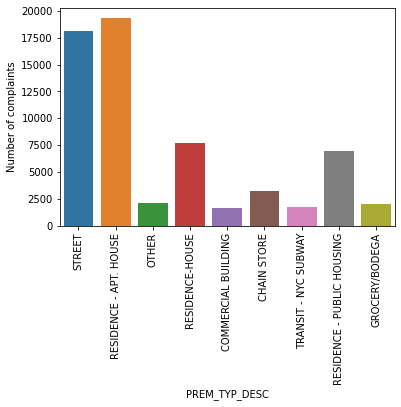

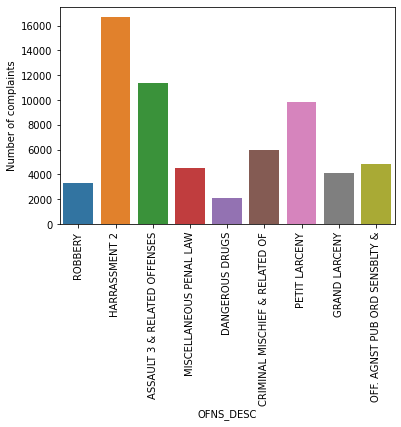

In [8]:
  sns.countplot(x = 'PREM_TYP_DESC', data = NYPD_df, palette = 'tab10')
  plt.xticks(rotation=90)
  plt.ylabel('Number of complaints')    
  plt.show()

  sns.countplot(x = 'OFNS_DESC', data = NYPD_df, palette = 'tab10')
  plt.xticks(rotation=90)
  plt.ylabel('Number of complaints')    
  plt.show()

In [9]:

NYPD_df = NYPD_df[attributes]

In [10]:
NYPD_c1 = pd.get_dummies(NYPD_df, columns = attributes)
mms = MinMaxScaler()
mms.fit(NYPD_c1)
data_transformed = mms.transform(NYPD_c1)
data_transformed.shape


(62663, 64)

In [ ]:
# Kmeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []
kmax = range(2,15)

for k in kmax:
  kmeans = KMeans(n_clusters = k).fit(data_transformed)
  labels = kmeans.labels_
  sil.append(silhouette_score(data_transformed, labels, metric = 'euclidean'))

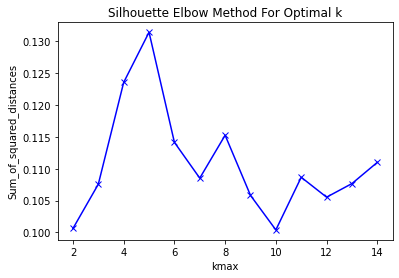

In [ ]:
plt.plot(kmax, sil, 'bx-')
plt.xlabel('kmax')
plt.ylabel('Sum_of_squared_distances')
plt.title('Silhouette Elbow Method For Optimal k')
plt.show()

In [11]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(data_transformed)
  Sum_of_squared_distances.append(km.inertia_)

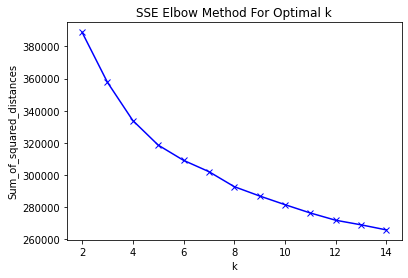

In [12]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('SSE Elbow Method For Optimal k')
plt.show()

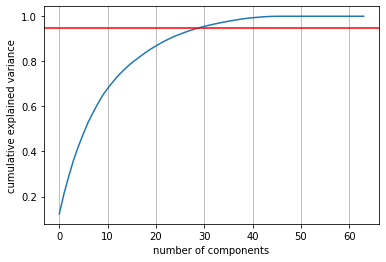

<Figure size 432x288 with 0 Axes>

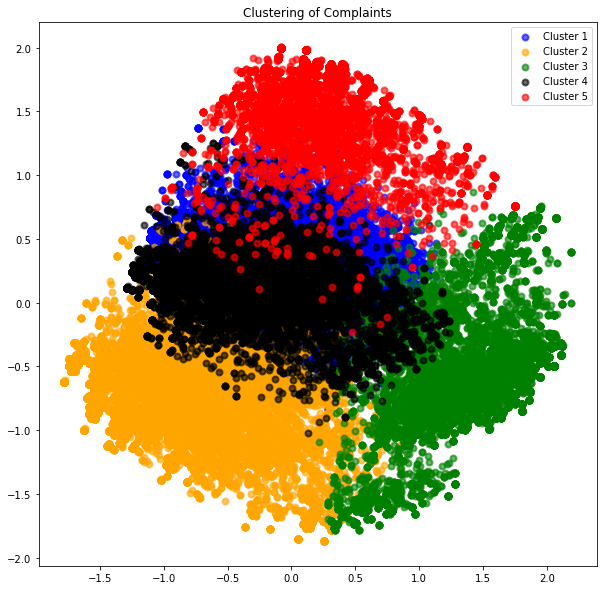

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# from above 2 methods we see 5 is best cluster size
pca = PCA().fit(NYPD_c1)
fig, ax = plt.subplots()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='-')
ax.grid(axis='x')

kmeans = KMeans(n_clusters = 5,  random_state = 5)
kmeans = kmeans.fit(NYPD_c1.values)
label = kmeans.predict(NYPD_c1.values)

# sns.scatterplot(data=NYPD_c1, x="var1", y="var2", hue=kmeans.labels_)
# plt.show()

pca = PCA(n_components = 30)
pca_label = pca.fit(NYPD_c1.values).transform(NYPD_c1.values)

plt.figure()
plt.figure(figsize=(10,10))
#Pick colors
colors = ['blue', 'orange', 'green', 'black', 'red']
#Name of the clusters
clusterNames = ["Cluster 1","Cluster 2","Cluster 3", "Cluster 4", "Cluster 5"]

for color, i, clsName in zip(colors, [0, 1, 2, 3, 4], clusterNames):
    plt.scatter(pca_label[label == i, 0], pca_label[label == i, 1], 
                color = color, alpha = 0.6, lw = 2,label = clsName)
    
plt.legend(loc='best', scatterpoints = 1)
plt.title('Clustering of Complaints')
plt.show()



In [17]:
K_groups = kmeans.labels_

# adding cluster to our dataset
NYPD_df_clustered = NYPD_df
NYPD_df_clustered['CLUSTERS'] = K_groups

NYPD_df_clustered['CLUSTERS CATEGORY'] = 'No Data'
category = 'CLUSTERS CATEGORY'
cluster = 'CLUSTERS'
for i in range(1, 5):
  NYPD_df_clustered[category].loc[NYPD_df_clustered[cluster] == i] = cluster + str(i)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Text(0, 0.5, 'Number of complaints')

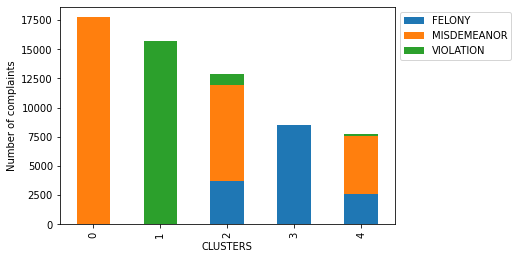

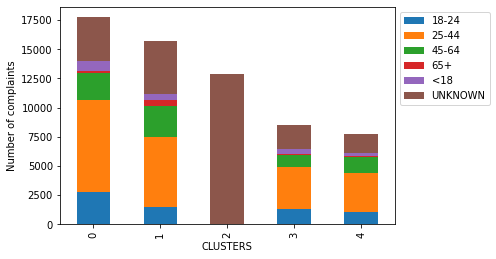

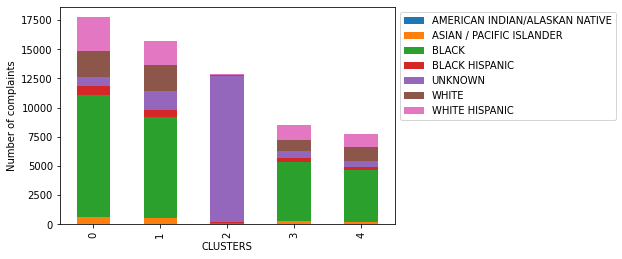

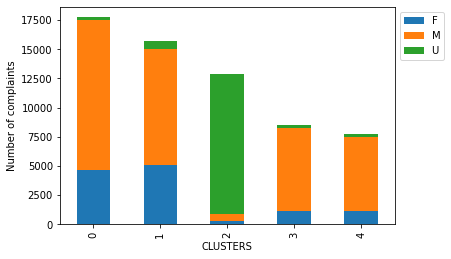

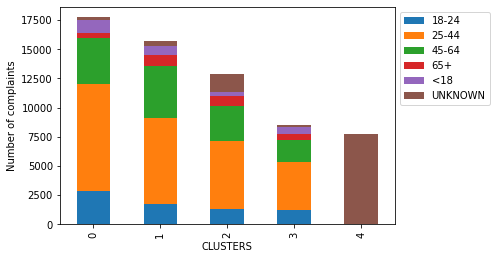

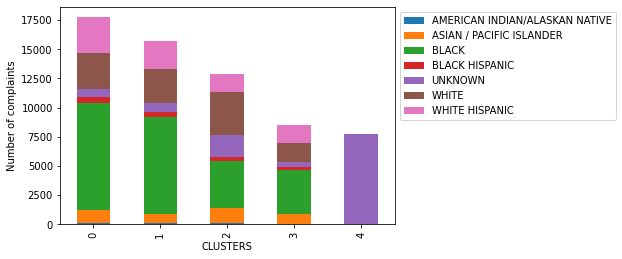

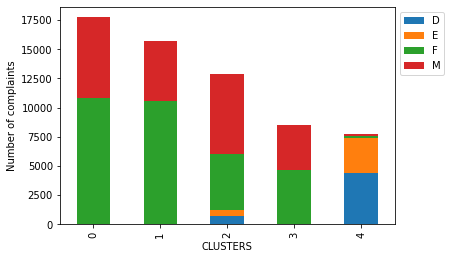

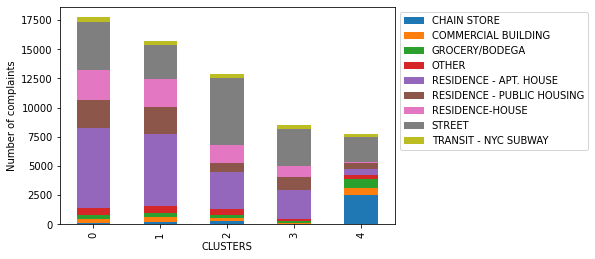

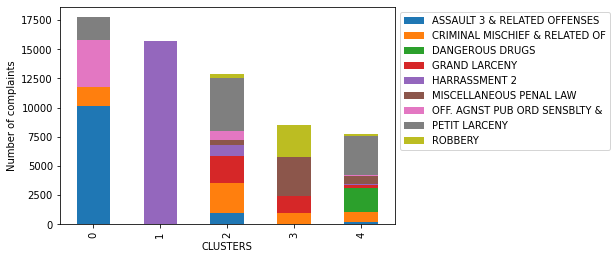

In [16]:
counts = NYPD_df_clustered.groupby(['CLUSTERS', 'LAW_CAT_CD']).LAW_CAT_CD.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = NYPD_df_clustered.groupby(['CLUSTERS', 'SUSP_AGE_GROUP']).SUSP_AGE_GROUP.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = NYPD_df_clustered.groupby(['CLUSTERS', 'SUSP_RACE']).SUSP_RACE.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = NYPD_df_clustered.groupby(['CLUSTERS', 'SUSP_SEX']).SUSP_SEX.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = NYPD_df_clustered.groupby(['CLUSTERS', 'VIC_AGE_GROUP']).VIC_AGE_GROUP.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = NYPD_df_clustered.groupby(['CLUSTERS', 'VIC_RACE']).VIC_RACE.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = NYPD_df_clustered.groupby(['CLUSTERS', 'VIC_SEX']).VIC_SEX.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.ylabel('Number of complaints')

counts = NYPD_df_clustered.groupby(['CLUSTERS', 'PREM_TYP_DESC']).PREM_TYP_DESC.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.ylabel('Number of complaints')

counts = NYPD_df_clustered.groupby(['CLUSTERS' , 'OFNS_DESC']).PREM_TYP_DESC.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.ylabel('Number of complaints')

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

NYPD_df.drop(['CLUSTERS', 'CLUSTERS CATEGORY'], axis=1, inplace=True)
# Standardize data
NYPD_df_c2 = pd.get_dummies(NYPD_df, columns = attributes)

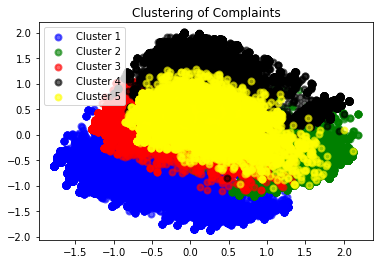

In [ ]:
gmm = GaussianMixture(n_components = 5) 
gmm.fit(NYPD_df_c2.values)
label = gmm.predict(NYPD_df_c2.values)

# Reducing the dimensions of the data 
pca = PCA(n_components = 30)
pca_label = pca.fit(NYPD_df_c2.values).transform(NYPD_df_c2.values) 

colors = ['blue', 'green', 'red', 'black', 'yellow']
#Name of the clusters
clusterNames = ["Cluster 1","Cluster 2","Cluster 3", "Cluster 4", "Cluster 5"]

for color, i, clsName in zip(colors, [0, 1, 2, 3, 4], clusterNames):
    plt.scatter(pca_label[label == i, 0], pca_label[label == i, 1], 
                color = color, alpha = 0.6, lw = 2,label = clsName)
    
plt.legend(loc='best', scatterpoints = 1)
plt.title('Clustering of Complaints')
plt.show()

In [ ]:
gmm_group = label

# adding cluster to our dataset
NYPD_df_2_clustered = NYPD_df
NYPD_df_2_clustered['CLUSTERS'] = gmm_group

NYPD_df_2_clustered['CLUSTERS CATEGORY'] = 'No Data'
category = 'CLUSTERS CATEGORY'
cluster = 'CLUSTERS'
for i in range(1, 5):
  NYPD_df_clustered[category].loc[NYPD_df_clustered[cluster] == i] = cluster + str(i)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Text(0, 0.5, 'Number of complaints')

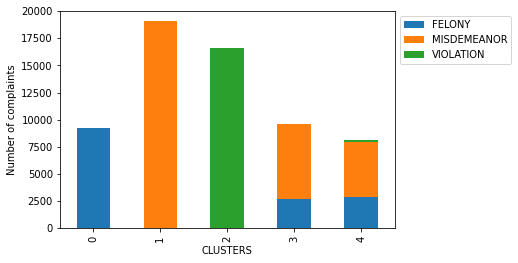

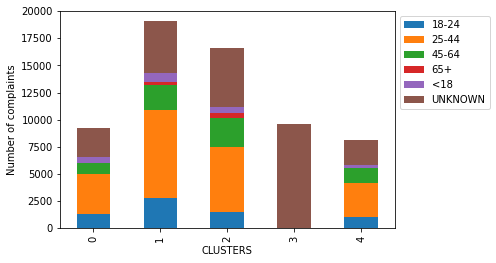

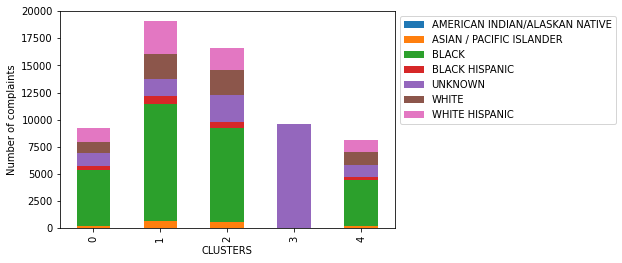

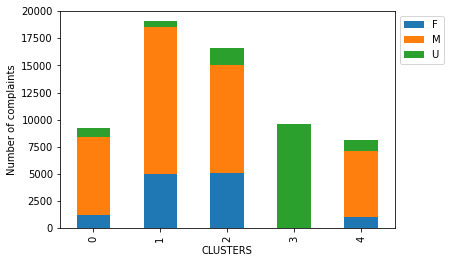

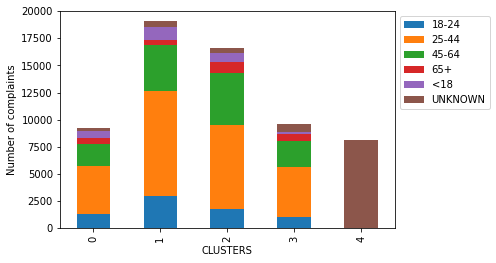

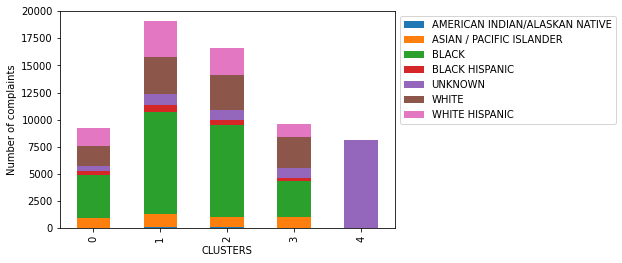

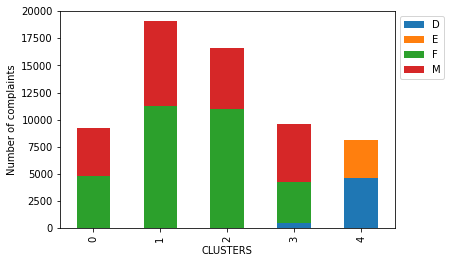

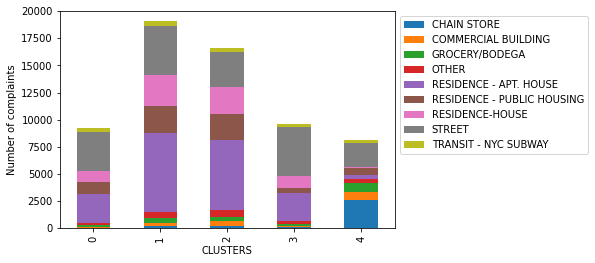

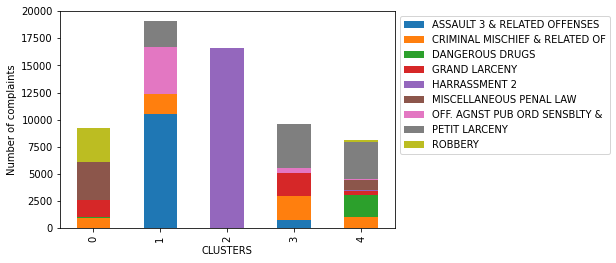

In [ ]:
counts = NYPD_df_2_clustered.groupby(['CLUSTERS', 'LAW_CAT_CD']).LAW_CAT_CD.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = NYPD_df_2_clustered.groupby(['CLUSTERS', 'SUSP_AGE_GROUP']).SUSP_AGE_GROUP.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = NYPD_df_2_clustered.groupby(['CLUSTERS', 'SUSP_RACE']).SUSP_RACE.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = NYPD_df_2_clustered.groupby(['CLUSTERS', 'SUSP_SEX']).SUSP_SEX.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = NYPD_df_2_clustered.groupby(['CLUSTERS', 'VIC_AGE_GROUP']).VIC_AGE_GROUP.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = NYPD_df_2_clustered.groupby(['CLUSTERS', 'VIC_RACE']).VIC_RACE.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = NYPD_df_2_clustered.groupby(['CLUSTERS', 'VIC_SEX']).VIC_SEX.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.ylabel('Number of complaints')

counts = NYPD_df_2_clustered.groupby(['CLUSTERS', 'PREM_TYP_DESC']).PREM_TYP_DESC.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.ylabel('Number of complaints')

counts = NYPD_df_2_clustered.groupby(['CLUSTERS' , 'OFNS_DESC']).PREM_TYP_DESC.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.ylabel('Number of complaints')